# Héctor Delgado Díaz and Samantha Gilbert

## Exoplanets Spring 2020

## HW 1a

### Problem 1

In this problem, we wish to develop a Kepler's EQ solver. We outlined the method we will use in class, in which we will optimize over Kepler's equation using Newton's method.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import optimize
import pandas as pd
import numpy.linalg as la

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# We first define a function that gives the solution to 
# the two-body problem in the form of Kepler's equation. 
# Since M = E - e * sin(E), we expect this function to equal 
# approximately 0 when correct. We will optimize over this 
# function using Newton's method.
#
# E = eccentric anomaly
# e = eccentricity 
# M = mean anomaly

def g(E, e, m):
    return E - e * np.sin(E) - M

In [0]:
# We now define a function that gives the partial derivative 
# of our first function g with respect to the eccentric anomaly E.
# Calculating the value of this partial derivative will help us
# to calculate E_i+1 at each subsequent iteration.

def dg_dE(E, e):
    return 1 - e * np.cos(E) 

In [0]:
# We will optimize over our function for g using Newton's method.
# In this method, we initialize the function with a starting guess 
# for the zeroth E given by:
# 
# E_0 = M + 0.85 * e * sign(sin(M)) 
# 
# where "sign" indicates a conditional function that changes the sign 
# in front of sin(M). 
# 
# We then iterate until we converge on a value for E. We accomplish
# this iteration by finding
# 
# dg/dE = 1 - e * cos(E)
# 
# and define each subsequent iteration of E relative to the last using
# the recursive relation
#
# E_i+1 = E_i - g(E, e, M)/(dg/dE)

def kepler(M, e):
    
    #Calculate initial values for E, g, and dg/dE.
    
    E_0 = M + 0.85 * e * np.sign(np.sin(M))
    
    g_0 = g(E_0, e, M) # Calculate the zeroth g given the zeroth E value
    
    dg_dE_0 = dg_dE(E_0, e) # Calculate the zeroth partial deriv. given the zeroth E value
    
    
    # Continue to interate as long as the last E value exceeds the given tolerance.
    
    while abs(-g(E_0, e, M)/dg_dE(E_0, e)) > 1E-14: # We define our tolerance for convergence to be 1e-14 based on the recommendation given in class
        
        E = E_0 - (g(E_0, e, M) / dg_dE(E_0, e)) # Calculate the next E value
        
        E_0 = E # Set the last E value as the new starting value
        
    return E_0 

Now that we have built our solver, we can test it by running it on a grid of e and M values and  verifying that the calculated E values always return the same M values. After calculating E and M, we compare the calculated M values to the true M values by subtracting the two. We observe that all differences return answers equal or very close to zero, showing that our solver works.

We also show a plot comparing the E and M orbital parameters. We see that for e = 0, or a circular orbit, we have E = M which produces a straight line on the plot. For increasingly higher eccentricities, the E and M values diverge more and more, culminating in the teal line representing the highest eccentricity.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


Text(0, 0.5, 'True M - Calculated M')

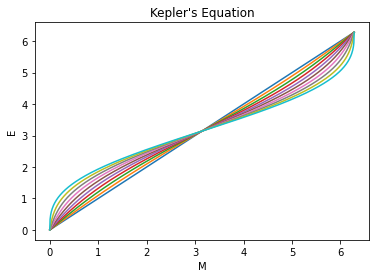

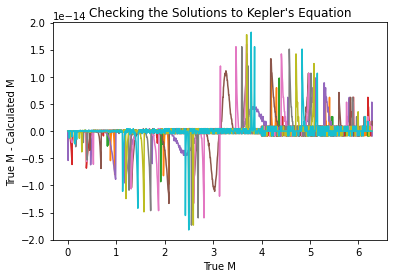

In [5]:
# Now that we have defined the necessary functions, we can test
# our solver on an array of e and M values. As given by the question,
# we will test values
# 
# 0 < e < 1
#
# and
#
# 0 < M < 2 * np.pi

e_vals = np.linspace(0, 1, 10) 

M_vals = np.linspace(0, 2 * np.pi, 1000)

'''-------------------------------------------------------------------'''

# Create the figure.

fig1 = plt.figure()

ax1 = plt.axes()

ax1.set_title('Kepler\'s Equation')

fig2 = plt.figure()

ax2 = plt.axes()

ax2.set_title('Checking the Solutions to Kepler\'s Equation')

'''-------------------------------------------------------------------'''

for e in e_vals:
    
    E_ans = [] # Initialize an array for storing our calculated E's.
    
    M_calc = []
    
    for M in M_vals:
        
        E = kepler(M, e) # Calculate E for the given M and e grids.
        
        E_ans.append(E) # Populate the array with the E's we've calculated.
        
        M_calc.append(E - e * np.sin(E))
        
    ax1.plot(M_vals, E_ans) # Plot the M values on the x-axis, and the calculated E values on the y.
    
    ax2.plot(M_vals, M_vals - M_calc)      
    
ax1.set_xlabel('M')

ax1.set_ylabel('E')

ax2.set_xlabel('True M')

ax2.set_ylabel('True M - Calculated M')

### Problem 2
In this problem, we will test our solver on a grid of e and M values and verify that we have actually optimized the function g using Newton's method. In order to verify this, we will calculate the solution to the function g for this e, M grid, and verify that the solutions are lower than the tolerance we set in our solver. This exercise produces very similar results to our last check, as the function g is essentially the difference between the "true" M and the calcualted M.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


Text(0, 0.5, 'g(E, e, M)')

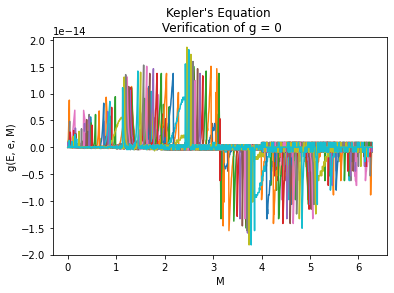

In [6]:
e_vals = np.linspace(0, 1, 20) 

M_vals = np.linspace(0, 2 * np.pi, 1000)


# Create the figure.

fig = plt.figure()

ax = plt.axes()

ax.set_title('Kepler\'s Equation \n Verification of g = 0')

'''-------------------------------------------------------------------'''

for e in e_vals:
    
    E_ans = [] # Initialize an array for storing our calculated E's.
    
    g_ans = [] # Initialize an array for storing our calculated g's.
    
    for M in M_vals:
        
        E_vals = kepler(M, e) # Calculate E for the given M and e grid.
        
        E_ans.append(E_vals) # Populate the array with the E's we've calculated.
        
        g_vals = g(E_vals, e, M) # Calculate g for the given M and e grid and the E's we calculated.
        
        g_ans.append(g_vals) # Populate the array with the g's we've calculated.
        
    ax.plot(M_vals, g_ans) # Plot the M values on the x-axis, and the calculated E values on the y.
    
    #print(np.shape(g_ans))
    
ax.set_xlabel('M')

ax.set_ylabel('g(E, e, M)')

## HW 1b

### Problem 1

In this problem, we want to write a function to implement the radial velocity/Doppler formula for a planet on an elliptical orbit by calling our Kepler solver.

In [0]:
# We use the radial velocity formula outlined in Wright & Howard (2009)
# to implement the RV/Doppler formula for a planet on an elliptical orbit.
# As defined in the paper, we take:
#
# h = K_star * cos(pomega)
#
# c = -K_star * sin(pomega)
#
# v_0 = gamma + K_star * cos(pomega)
#
# The variable "f" represents the true anomaly, which we will calculate 
# using the E values we calculated from our Kepler solver.

def calc_rv(h, c, v_0, f):
    return np.multiply(h, np.cos(f)) + np.multiply(c, np.sin(f)) + v_0

def f(e, E):
    return 2 * np.arctan( ((1 + e) / (1 - e))**(1/2) * np.tan(kepler(M,e) / 2) )


### Problem 2

In this problem, we want to write a function to calculate the phase from the RV dataset provided in the "mystery planet" text file. We then want to plot a periodogram for this data.

In [0]:
#path = '/Users/samanthagilbert/Desktop/'

file_name = 'mystery_planet01.txt'

data = pd.read_csv(file_name, delim_whitespace=True, header=None)

time = data[0]
rv = data[1]
rv_err = data[2]

data.columns = ['time','rv','rv_err']

In [0]:
# By definition, the phase of a sinusoid is equal to time divided 
# by the period. Here, P = orbital period.

def calc_phase(time, P):
    phase = (time % P)
    #print(phase)
    return phase

We now want a function that calculates the scatter of the RV based on the period time. We define scatter at each period to be the difference in neighboring radial velocity data squared such that

$$\sigma = (RV_i - RV_{i+1})^2 $$

The best fit period will minimize the scatter.

In [0]:
# The formula is given by
#
# S_p = Sum(v_i - v_(i+1))^2 from i=1 to i = N-1
#
# S_p is the scattering per period and v denotes the radial velocity at two adjacent intervals.
# The sum is over all the radial velocities.

def calc_scatter(rv_sort): # The RV is sorted in terms of the phase
    N = rv_sort.shape[0]
    scatter = 0
    for i in range(N - 1):
        scatter += (rv_sort[i] - rv_sort[i + 1])**2
    return scatter

We define a periodogram function to create the plots of the RV in terms of the RV scattering and the period of the planet.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


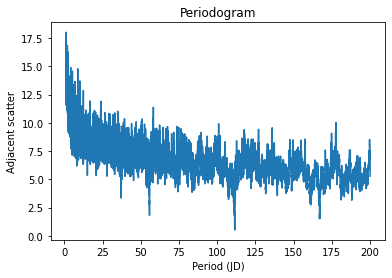

In [20]:
scatters = []
for p in np.linspace(1, 200, 10000):
    data['{:3f}'.format(p)] = calc_phase(data.time, p)
    scatters.append(calc_scatter(data.sort_values('{:3f}'.format(p)).rv.values))

plt.plot(np.linspace(1, 200, 10000),scatters)
ax = plt.axes()
ax.set_title('Periodogram')
ax.set_xlabel('Period (JD)')
ax.set_ylabel('Adjacent scatter')
plt.show()



Having plotted scatters for multiple periods, we find the period that minimizes the scatter to identify the orbital period of the RV data.

In [21]:
np.linspace(1, 200, 10000)[np.argmin(scatters)]

111.47594759475948

We find that the period that minimizes the scatter is P = 111.476 JD. Using this period to resort our RV and folded time data, we can produce a new periodogram.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


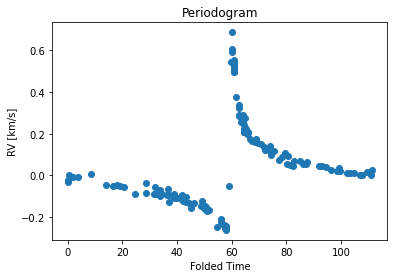

In [22]:
p = np.linspace(1, 200, 10000)[np.argmin(scatters)]
data['{:3f}'.format(p)] = calc_phase(data.time, p)
rv_periodogram = data.sort_values('{:3f}'.format(p)).rv.values
folded_time = data.sort_values('{:3f}'.format(p))['{:3f}'.format(p)]

plt.scatter(folded_time,rv_periodogram)
ax = plt.axes()
ax.set_title('Periodogram')
ax.set_xlabel('Folded Time')
ax.set_ylabel('RV [km/s]')
plt.show()

###Problem 3

From the periodogram we found the optimized period for the data which we will use to fit on the RV data and find the parameters related to the RV problem (i.e. e, $t_p$, $\gamma$, K).

On problem 1b.1, we already defined our linearized parameters for the RV model and the true anomaly $f$ while on problem 1a we define a function to calculate the eccentric anomaly $E$ using Newton's method. These functions will help us find the rest of the parameters.

In [0]:
def calc_M(period, time, t_p):
    return 2 * np.pi / period * (time - t_p)

In [0]:
def calc_W(err):
    np.diag(np.divide(1.,np.power(err,2)))

In [0]:
def calc_F(f):
    N = len(f)
    cos_f = np.cos(f)
    sin_f = np.sin(f)
    ones = np.ones(N)
    
    F = np.vstack(cos_f, sin_f, ones) # This would give all cosines, sines and ones in different rows each which it wouldn't be the transpose of eq. 15 tho
    return F

In [0]:
def calc_eps(w, f):
    arr = np.ones(f.shape[0])
    huh = np.multiply(1e-9, arr)
    diag = np.diag(huh)

    mult = np.dot(f,w)
    epsilon = la.inv(mult * f.transpose() + huh)

    return epsilon

In [0]:
def calc_b(w, f, epsilon, rv_data):
      mult1 = np.dot(rv_data, w)
      mult2 = np.dot(mult1, f.transpose())
      b = np.dot(mult2, epsilon)
      return b

In [0]:
def chi_sq(rv_data, err, rv_calc):
    return((rv_data - rv_calc) ** 2 / (err) ** 2)

In [34]:
e_vals = np.linspace(0, 1, 1000)
tp_vals = np.linspace(np.amin(time), np.amax(time), 1000)


#initial values

chi_init = 1e10
e_opt = 0.9
tp_opt = np.amin(time) + p / 2

for e in e_vals:
    for tp in tp_vals:
        if any([p < 0, tp < 0, e < 0, e > 1]): # Sanity-check for each iteration
          chi_calc = 2E10
        else:
          M_vals = calc_M(p, time, tp)
          E_vals = kepler(M_vals, e)
          f_vals = f(e, E_vals)

          W = calc_W(rv_err)
          F = calc_F(f_vals) # Not to be confused with f (true anomaly)
          epsilon = calc_eps(W, F)
          b = calc_b(W, F, epsilon, rv)

          h, c, v = b[0], b[1], b[2]

          rv_calc = calc_rv(h, c, v, f_vals)

          chi_calc = chi_sq(rv_data, rv_err, rv_calc)

          if chi_calc < chi_init:
              chi_init = chi_calc
              e_opt = e
              tp_opt = t

gamma = v - e_opt * h
K = np.sqrt(h ** 2 + c ** 2) 

ValueError: ignored

In [0]:
print("Minimized period of the exoplanet = ", p)
print("Minimized eccentricity for the exoplanet = ", e_opt)
print("Minimized time of periastron = ", tp_opt)
print("Minimized velocity of the center of mass of the system = ", gamma)
print("Minimized semi-amplitude of the radial velocity of the star = ", K)
